In [1]:
# !pip install celluloid ##uncomment if not installed in your environment

## Modeling Contagion with Hypergraphs
This work is based on the paper [The effect of heterogeneity on hypergraph contagion models by Nicholas Landry](https://aip.scitation.org/doi/10.1063/5.0020034)
The SIS and SIR simulations will each take several minutes to run.

In [2]:
import hypernetx as hnx
import hypernetx.algorithms.contagion as contagion
import matplotlib.pyplot as plt
import random
import time
import warnings 
warnings.simplefilter('ignore')

In [3]:
n = 1000 
m = 10000 

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList, static=True)

## Initialize simulation variables
- $\tau$ is a dictionary of the infection rate for each hyperedge size
- $\gamma$ is the healing rate
- $t_{max}$ is the time at which to terminate the simulation if it hasn't already
- $\Delta t$ is the time step size to use for the discrete time algorithm


In [4]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 1

## Run the SIR epidemic simulations
- The discrete SIR takes fixed steps in time and multiple infection/healing events can happen at each time step.
- The Gillespie SIR algorithm takes steps in time exponentially distributed and at each step forward, a single event occurs
- As $\Delta t\to 0$, the discrete time algorithm converges to the Gillespie algorithm. 

In [5]:
start = time.time()
t1, S1, I1, R1 = contagion.discrete_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax, dt=dt)
print(time.time() - start)
## ~15.358373165130615 sec

start = time.time()
t2, S2, I2, R2 = contagion.Gillespie_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax)
print(time.time() - start)
## ~5.23570895195007 sec

13.769928932189941
4.735192060470581


The Gillespie algorithm is much faster in many cases (and more accurate) than discrete-time algorithms because it doesn't consider events that don't happen. Instead, it calculates when the next event will occur and what event (infection, recovery, etc.) it will be.

## Plot of the results
- Dashed lines are the results from the discrete time algorithm
- Solid lines are the results from the Gillespie algorithm
- Plots of the numbers susceptible, infected, and recovered over time


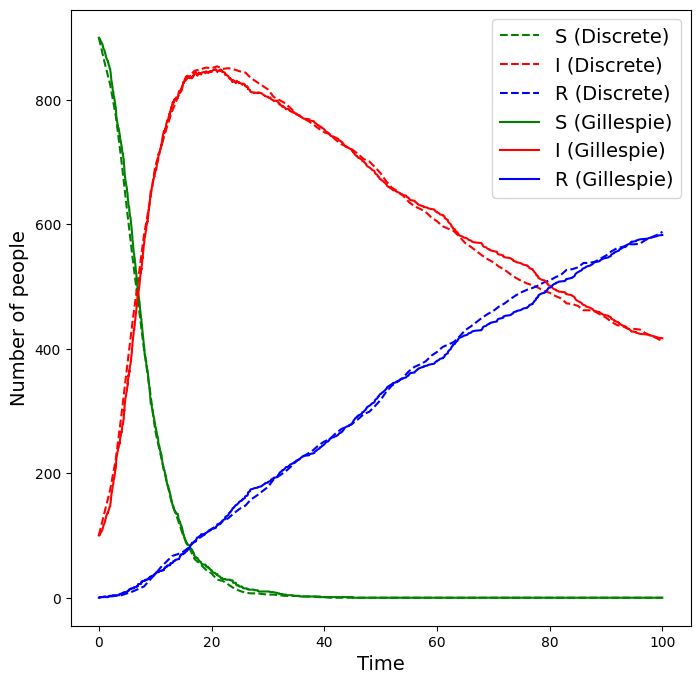

In [6]:
plt.figure()
plt.plot(t1, S1, 'g--', label='S (Discrete)')
plt.plot(t1, I1, 'r--', label='I (Discrete)')
plt.plot(t1, R1, 'b--', label='R (Discrete)')
plt.plot(t2, S2, 'g-', label='S (Gillespie)')
plt.plot(t2, I2, 'r-', label='I (Gillespie)')
plt.plot(t2, R2, 'b-', label='R (Gillespie)')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.legend(fontsize=14)
plt.show()

## SIS Model
In this model, once individuals heal, they may become re-infected.

In [7]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 1
start = time.time()
t1, S1, I1 = contagion.discrete_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax, dt=dt)
print(time.time() - start)
# ~680.240907907486 sec

start = time.time()
t2, S2, I2 = contagion.Gillespie_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax)
print(time.time() - start)


# ~236.78710913658142 sec

20.26686191558838
7.445334196090698


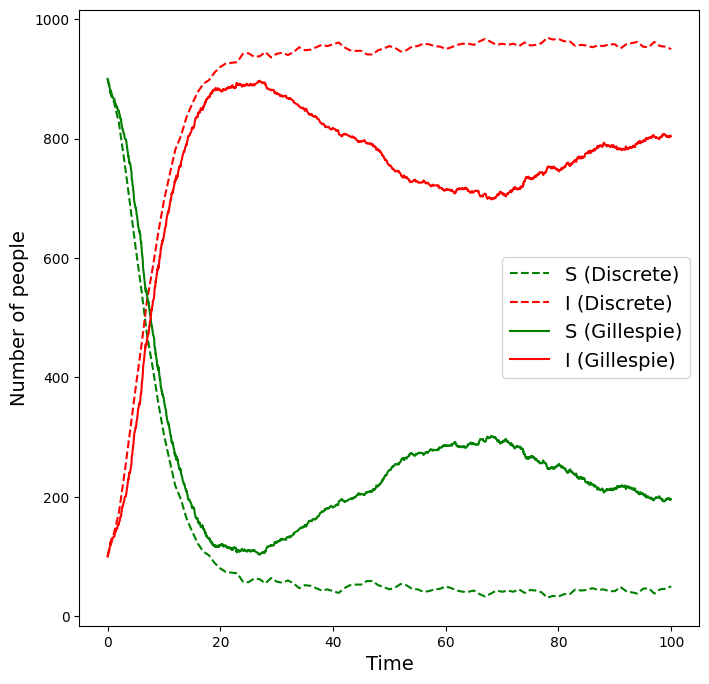

In [8]:
plt.figure()
plt.plot(t1, S1, 'g--', label='S (Discrete)')
plt.plot(t1, I1, 'r--', label='I (Discrete)')
plt.plot(t2, S2, 'g-', label='S (Gillespie)')
plt.plot(t2, I2, 'r-', label='I (Gillespie)')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Animation of SIR model

In [9]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import random
import time
import hypernetx.algorithms.contagion as contagion
import numpy as np
from IPython.display import HTML

In [10]:
n = 100
m = 40

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList, static=True)

In [11]:
tau = {2:2, 3:1}
gamma = 0.1

In [12]:
transition_events = contagion.discrete_SIR(H, tau, gamma, 
                                           rho=0.2, tmin=0, 
                                           tmax=50, dt=1, return_full_data=True)

In [13]:
for time, events in transition_events.items():
    if events:
        for event in events:
            if event[0] == 'R':
                print(f"At time {time}, {event[1]} recovered")
            elif event[0] == 'I' and event[2] is not None:
                print(f"At time {time}, {event[1]} was infected by {event[2]}")

At time 1, 46 was infected by 0
At time 1, 94 was infected by 2
At time 1, 41 recovered
At time 1, 70 was infected by 4
At time 1, 73 was infected by 4
At time 1, 53 was infected by 6
At time 1, 12 was infected by 7
At time 1, 77 was infected by 27
At time 1, 75 was infected by 31
At time 1, 96 was infected by 9
At time 1, 21 was infected by 11
At time 1, 22 was infected by 11
At time 1, 90 was infected by 22
At time 1, 13 was infected by 20
At time 1, 16 was infected by 27
At time 1, 97 was infected by 28
At time 1, 91 was infected by 30
At time 1, 32 was infected by 31
At time 1, 66 was infected by 35
At time 2, 89 recovered
At time 2, 51 recovered
At time 2, 62 was infected by 19
At time 2, 39 was infected by 25
At time 2, 55 was infected by 36
At time 2, 81 was infected by 15
At time 2, 15 was infected by 15
At time 2, 8 was infected by 17
At time 2, 63 was infected by 17
At time 2, 31 was infected by 26
At time 2, 16 recovered
At time 2, 40 was infected by 36
At time 3, 52 was inf

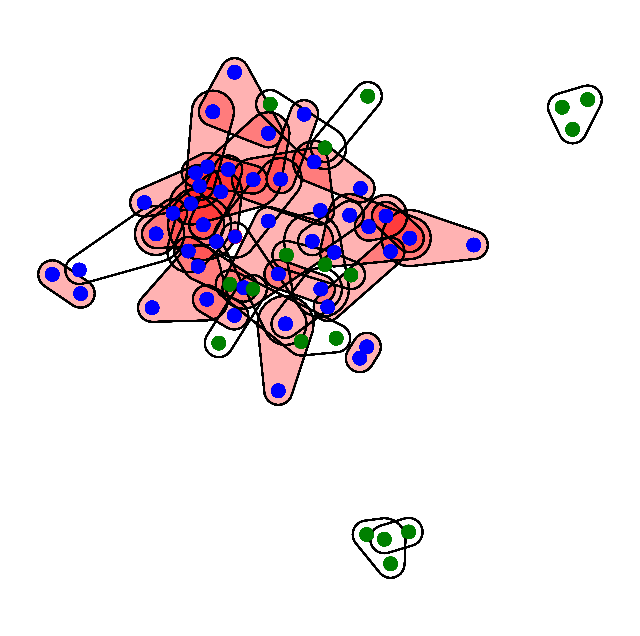

In [14]:
node_state_color_dict = {"S":"green", "I":"red", "R":"blue"}
edge_state_color_dict = {"S":(0, 1, 0, 0.3), "I":(1, 0, 0, 0.3), 
                        "R":(0, 0, 1, 0.3), "OFF": (1, 1, 1, 0)}

fps = 1

fig = plt.figure()
animation = contagion.contagion_animation(fig, H, transition_events, 
                                          node_state_color_dict, 
                                          edge_state_color_dict, node_radius=1, 
                                          fps=fps)
plt.show()

In [15]:
HTML(animation.to_jshtml())

## Animation of the SIS model

In [16]:
transition_events2 = contagion.discrete_SIS(H, tau, gamma, rho=0.2, tmin=0, tmax=50, dt=1, return_full_data=True)

In [17]:
for time, events in transition_events2.items():
    if events:
        for event in events:
            if event[0] == 'S':
                print(f"At time {time}, {event[1]} recovered")
            elif event[0] == 'I' and event[2] is not None:
                print(f"At time {time}, {event[1]} was infected by {event[2]}")

At time 1, 89 was infected by 0
At time 1, 33 was infected by 3
At time 1, 70 was infected by 17
At time 1, 62 was infected by 5
At time 1, 52 was infected by 5
At time 1, 53 was infected by 6
At time 1, 18 was infected by 10
At time 1, 21 was infected by 36
At time 1, 81 was infected by 23
At time 1, 4 was infected by 23
At time 1, 15 was infected by 25
At time 1, 8 was infected by 17
At time 1, 11 was infected by 24
At time 1, 72 was infected by 24
At time 1, 26 recovered
At time 1, 27 was infected by 32
At time 1, 37 was infected by 32
At time 1, 74 was infected by 34
At time 1, 40 was infected by 36
At time 2, 73 was infected by 4
At time 2, 51 was infected by 4
At time 2, 39 recovered
At time 2, 98 recovered
At time 2, 75 was infected by 31
At time 2, 55 recovered
At time 2, 18 recovered
At time 2, 10 was infected by 11
At time 2, 22 was infected by 11
At time 2, 25 was infected by 13
At time 2, 90 was infected by 15
At time 2, 13 was infected by 19
At time 2, 72 recovered
At time

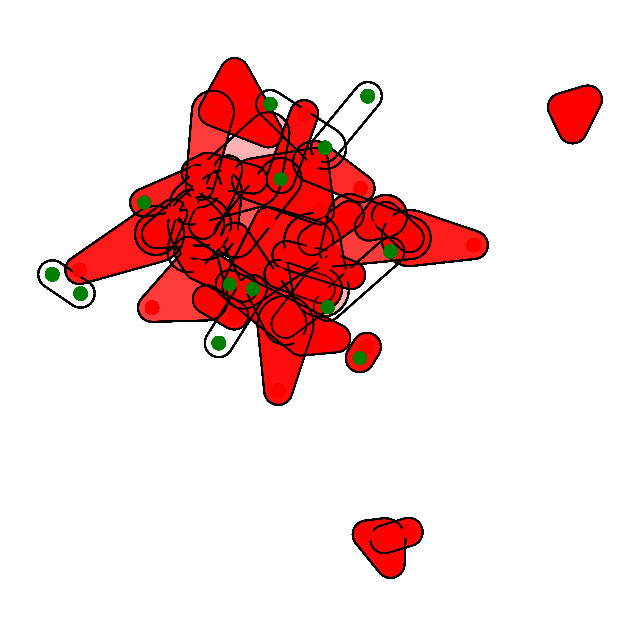

In [18]:
node_state_color_dict = {"S":"green", "I":"red", "R":"blue"}
edge_state_color_dict = {"S":(0, 1, 0, 0.3), "I":(1, 0, 0, 0.3), 
                         "R":(0, 0, 1, 0.3), "OFF": (1, 1, 1, 0)}

fps = 1

animation2 = contagion.contagion_animation(fig, H, 
                                           transition_events2, 
                                           node_state_color_dict, 
                                           edge_state_color_dict, 
                                           node_radius=1, fps=fps)
plt.show()

In [19]:
HTML(animation2.to_jshtml())